In [108]:
# imports
import pandas as pd
import matplotlib

%matplotlib inline

In [109]:
# read in roster & stats data
df = pd.read_csv('b_r_nba_heights_scrape.csv')

# read in standings data
standings_df = pd.read_csv('br_standings_15.csv')

In [110]:
df.head()

,Unnamed: 0,Team,No,Player,Pos,Ht,Wt,Birth_Date,Exp,College,...,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,LAL,28,Tarik Black,C,6-9,257,"November 22, 1991",R,University of Kansas,...,0.562,84,157,241,34,13,22,29,102,274
1,1,LAL,12,Vander Blue,SG,6-4,200,"July 17, 1992",1,Marquette University,...,0.400,2,7,9,8,3,0,6,4,22
2,2,LAL,5,Carlos Boozer,PF,6-9,258,"November 20, 1981",12,Duke University,...,0.627,111,371,482,95,41,12,92,184,836
3,3,LAL,15,Jabari Brown,SG,6-6,214,"December 18, 1992",R,University of Missouri,...,0.753,3,33,36,40,12,2,32,33,227
4,4,LAL,24,Kobe Bryant,SG,6-6,200,"August 23, 1978",18,NaN,...,0.813,26,173,199,197,47,7,128,65,782


In [111]:
standings_df.head()

,Rk,Team,Team_Abbrev,Overall,Home,Road,E,W,A,C,...,Post,?3,?10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Golden State Warriors,GSW,67-15,39-2,28-13,25-5,42-10,1-Sep,3-Jul,...,25-6,3-May,45-9,Jan-00,13-2,3-Nov,3-Dec,3-Aug,16-2,2-Jun
1,2,Atlanta Hawks,ATL,60-22,35-6,25-16,38-14,22-8,6-Dec,14-4,...,17-11,4-Jun,30-10,0-1,5-Sep,14-2,17-0,4-Jul,7-Sep,3-Apr
2,3,Houston Rockets,HOU,56-26,30-11,26-15,23-7,33-19,1-Sep,2-Aug,...,20-9,4-Aug,31-14,Feb-00,4-Nov,5-Sep,6-Nov,3-Jul,6-Oct,2-Jun
3,4,Los Angeles Clippers,LAC,56-26,30-11,26-15,19-11,37-15,3-Jul,4-Jun,...,21-7,5-Mar,33-9,Feb-00,5-Sep,6-Nov,4-Nov,6-May,5-Nov,Jul-00
4,5,Memphis Grizzlies,MEM,55-27,31-10,24-17,20-10,35-17,2-Aug,5-May,...,16-13,3-Sep,26-13,Feb-00,13-2,6-Aug,4-Dec,4-Jul,8-Sep,3-Apr


In [44]:
# create a dataframe that shows the total minutes played by team
MP_team = df.groupby('Team').MP.sum() 
MP_team = MP_team.reset_index()
MP_team = MP_team.rename(columns={'MP':'MP_Team'})

# merge the total minutes by team dataframe with the roster dataframe
MP_df = pd.merge(df,MP_team,on ='Team',how='left')

# calculated weighted heights and weighted weight for each player
MP_df['Weighted_Ht'] = MP_df['ht_in'] * MP_df['MP'] / MP_df['MP_Team']
MP_df['Weighted_Wt'] = MP_df['Wt'] * MP_df['MP'] / MP_df['MP_Team']

# groupby team to see the averages for each team
team_df = MP_df.groupby('Team')['Weighted_Ht','Weighted_Wt'].sum()

# reset index to make team its own column
team_df = team_df.reset_index()
team_df.head()

,Team,Weighted_Ht,Weighted_Wt
0,ATL,78.523616,218.386580
1,BOS,78.515191,221.493461
2,BRK,79.048424,224.027599
3,CHI,79.361602,210.302148
4,CHO,78.144185,220.631600


In [45]:
# reduce standings df to relevant columns
standings_df = standings_df.copy()[['Team_Abbrev','Overall']]
# create wins column from overall standings column
standings_df['Wins'] = standings_df['Overall'].map(lambda x: int(x.split('-')[0]))
# rename column names to align with team dataframe
standings_df.columns = ['Team','Overall','Wins']

# merge team & standings dataframes together
team_df = pd.merge(team_df, standings_df[['Team','Wins']], how='left', on='Team')
team_df.head()

,Team,Weighted_Ht,Weighted_Wt,Wins
0,ATL,78.523616,218.386580,60
1,BOS,78.515191,221.493461,40
2,BRK,79.048424,224.027599,38
3,CHI,79.361602,210.302148,50
4,CHO,78.144185,220.631600,33


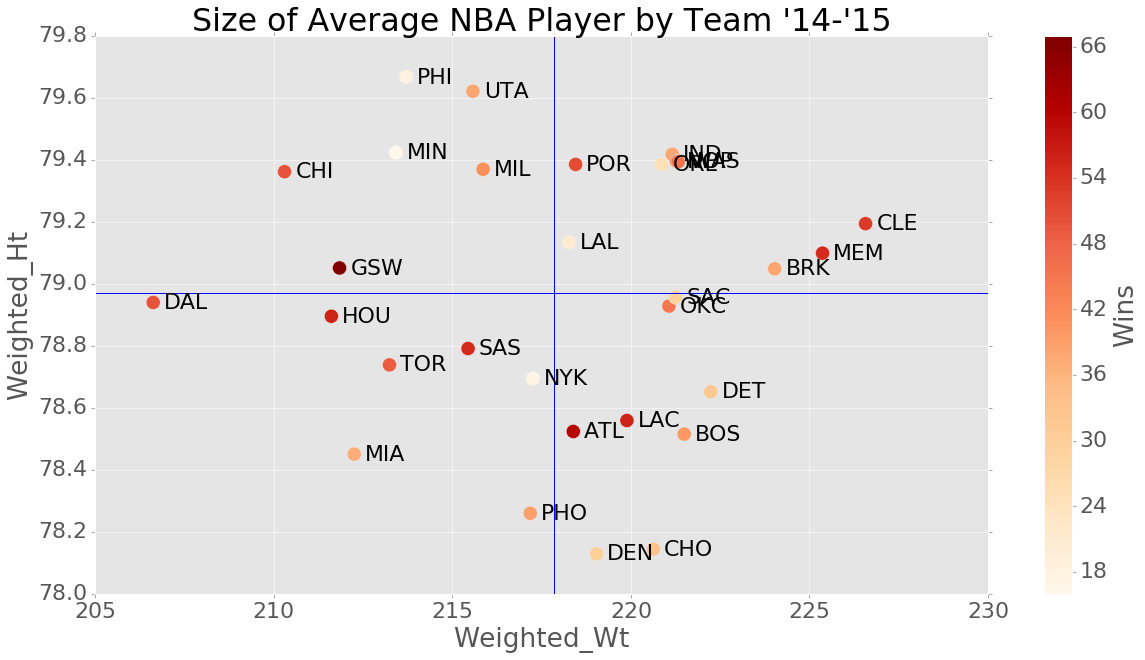

In [92]:
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})

ax = team_df.plot(kind='scatter', x='Weighted_Wt', y='Weighted_Ht', c='Wins', colormap='OrRd',
                  s=200, figsize=(20,10), sharex=False,
                  title="Size of Average NBA Player by Team '14-'15")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.3, point['y']-.02, str(point['val']))
        
label_point(team_df.Weighted_Wt, team_df.Weighted_Ht, team_df.Team, ax)

ax.axhline(y=team_df.Weighted_Ht.mean())
ax.axvline(x=team_df.Weighted_Wt.mean())